In [155]:
# Initialize Otter
import otter
grader = otter.Notebook("HW_1_data_numpy.ipynb")

# HW 1: Statistical analysis of data using numpy and matplotlib

Resources: Lecture slides describing the homework: https://docs.google.com/presentation/d/1ef0msC9XIT37_Yg94Cf4TL9VBgbIIfkKik8jgshskjE/edit?usp=sharing

Please do lab 1 before starting this homework, and do lab 2 before tackling problem 4 (the plotting part).

In this homework the focus is on code *design*. Most of the functionality of the code will be what you did in the labs. I don't expect you to do the code design; I've provided that. Just pay attention to how a couple of code structuring tools (functions, dictionaries) can make your code a little more re-usable, cleaner, and less prone to error. 

- Generalization 1: Put the code that calculates the statistics into a function 
- Generalization 2: Store the results in a dictionary so it's labeled and you don't have to worry about variable name re-use

Learning to *read* code is also as important as *writing* code. This is (hopefully) a gentle introduction to using/interacting with more advanced concepts/syntax/semantics. 

Where you're going with Problems 1, 2, and 3: Take a look in the **Data** directory at the **week_1_check_results.json** file (open it up with a text editor). Compare it to **proxy_data_description.json**.  When you are done with problems 1-3 you will have a dictionary that has the statistical summary data in it.

## Week 1, problem 0: Setting up libraries
TODO: Import the libraries that you will need (numpy, json, matplotlib for week 2)

In [156]:
# Libraries that we need to import - numpy and json (for loading the description file)
import numpy as np
import json as json
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: put the numpy, json, and matplotlib (week 2) imports here so you can use those libraries (see the tops of Lab 1 & 2)

In [157]:
grader.check("imports")

imports results: All test cases passed!

## Week 1, problem 1: stats for one channel function

The idea behind this function is to encapsulate getting all of the statistics for a single channel of data in **proxy_pick_data.csv**. Conceptually, this function does the same thing as all the code up through "compute stats" in lab1 - but for *any* channel, not just the wrist torque channel. And we'll throw in some additional stats to compute (mean and standard deviation). In summary:

- Figure out where to start slicing (index_wrist_torque_offset in lab 1)
- Figure out the spacing to use for slicing (n_total_dims)
- Actually slice the data
- Compute the stats for that slice of data

Because it's a function, we need to pass in all of the data/information we're going to need to compute the slice. There are many possible solutions to this, the one I chose was:

- Pass in the original data as the first parameter (this will be pick_data, minus the last column with the successful/unsuccessful information)
- The channel information from the dictionary (this has the channel name, the start index, and the number of dimensions)
- Which dimension of the data (x, y, or z)
- What spacing to use (n_total_dims)

The last parameter isn't strictly necessary - we could recompute it within this function - but since we have it, and it's the same for all channels, compute it once and pass it in.

Note that, instead of passing in which dimension we are interested in, this function *could* have computed all three dimensions and returned the stats for all three. No real reason to do it one way or the other (and, in fact, if you want to try doing it that way, go ahead).

In [158]:
def get_stats_for_channel(data, channel_info, xyz_dim, n_total_dims):
    """ Get the min, max, mean, standard deviation stats for the given channel and dimension
    @param data - the numpy array from the csv file (pick_data)
    @param channel_info - a dictionary with the channel info, which has in it the name, index_offset, and dimensions
      This is the data channel information in proxy_pick_description
    @param xyz_dim - 0, 1, or 2 for x, y, z
    @param n_total_dims - total number of columns per one time step
    @returns - A dictionary with the statistics values """

    # TODO: Calcluate min, max, mean, and standard deviation for the data channel - first part of lab 1
    
    # Printing these here so you can see what they are - take them out when the function is working
    print(f"Data size: {data.shape}")
    print(f"Channel info: {channel_info}")
    print(f"xyz_dim: {xyz_dim}")
    print(f"n total dims: {n_total_dims}")
    # This is found in the channel_info dictionary, with the key "index_offset"    
    index_offset = channel_info["index_offset"]
    start = index_offset + xyz_dim
    channel_data = data[:,start::n_total_dims]

    min = np.min(channel_data)
    max = np.max(channel_data)
    mean = np.mean(channel_data)
    std = np.std(channel_data)

    
    # The np.min(data[:, start:end:stop]) code from lab replaces the 0 
    ret_stats = {"Min": min,
                 "Max": max,
                 "Mean": mean,
                 "SD": std}
    return ret_stats


In [159]:
# Test data - 5 rows with duplicate data, 2 channels 
#.  first channel is t values between 0 and 2 pi
#   second column is cos(t)
# Note that passing this test does not mean that EVERYTHING is correct with your function - but it should catch most
# of the errors
n_rows = 5
n_channels = 2
n_time_steps = 360
data = np.zeros((n_rows, n_channels * n_time_steps))
for i in range (0, n_rows):
    data[i, 0::n_channels] = np.linspace(0, 2 * np.pi, n_time_steps)
    data[i, 1::n_channels] = np.cos(np.linspace(0, 2 * np.pi, n_time_steps))

channel_info_cos = {"name": "cos",
                    "index_offset": 1,
                    "units": "inches"}

# Actually call the function
# Before you edit the function above this will print out the input parameters 
ret_stats = get_stats_for_channel(data=data, channel_info=channel_info_cos, xyz_dim=0, n_total_dims=n_channels)

# ... and return 0's for all values
print(ret_stats)

# When the function is working correctly ret_stats will be (don't forget to take out the print statements in the function)
#   You should verity for yourself that these values are correct for data that goes form cos(0) to cos(2pi)...
# {'Min': -0.9999617106423081, 'Max': 1.0, 'Mean': 0.0027777777777776512, 'SD': 0.7080827443452539}

Data size: (5, 720)
Channel info: {'name': 'cos', 'index_offset': 1, 'units': 'inches'}
xyz_dim: 0
n total dims: 2
{'Min': -0.9999617106423081, 'Max': 1.0, 'Mean': 0.0027777777777776512, 'SD': 0.7080827443452539}


In [160]:
grader.check("stats_function")

stats_function results: All test cases passed!

## Week 1, problem 2: Read in the proxy pick data and the proxy pick description file

Read in both the data file (**proxy_pick_data.csv**) and the file that describes the data (**proxy_data_description.json**). See Lab 1.

In [161]:

# TODO: Copy code from lab 1 to read in proxy_pick_data.csv and put it in pick_data
data_from_csv = np.loadtxt("Data/proxy_pick_data.csv", dtype="float", delimiter=",")
pick_data = data_from_csv
# TODO Copy code to read in proxy_data_description.json and put it in pick_data_description
try:
    with open("Data/proxy_data_description.json", "r") as fp:
        pick_data_description = json.load(fp)
except FileNotFoundError:
    print(f"The file was not found; check that the data directory is in the current one and the file is in that directory")

In [162]:
grader.check("read_data")

read_data results: All test cases passed!

## Week 1: Problem 3: calculate and store data

Calculate **n_total_dims** and **n_time_steps** as in lab 1, but this time store them as items in the **pick_data_description** dictionary.

Why: Two reasons. First, that information, conceptually, belongs there. As we'll see in later homeworks, having all related data in a dictionary means you just have to pass around the dictionary, not all of the individual variables. Second, it's always a good idea to minimize the number of loose variables floating around.

Drawbacks: There's a tiny overhead for accessing values from a dictionary (eg, d["foo"]) and you have to remember what key you used when you put the data in.

In [163]:
# TODO: Calculate the total dimensions and time steps and store them in the dictionary, using the given keys
#  You MUST calculate these - not just set them to be 33, and 40 (which are the correct answers)
data_channels = pick_data_description["Data channels"]
n_total_dims = sum(item["dimensions"] for item in data_channels)
  
column = pick_data.shape[1]

n_time_steps = column // n_total_dims


pick_data_description["n_total_dims"] = n_total_dims
pick_data_description["n_time_steps"] = n_time_steps

In [164]:
grader.check("calculate")

calculate results: All test cases passed!

##  Week 1: Problem 4: Print stats for each sensor channel

At this point it's time to do the actual work - calculating the stats for each sensor channel, and storing them back in the **pick_data_description variable**. 

I've set this up so that you can write the function **get_stats_for_channel** (already done), then check it (step 1), then incrementally add in the **for** loops (steps 2 and 3). You're free to jump straight to step 3 if you want, but if it doesn't work, please go through steps 1 and 2 before asking the TA for help.

In [165]:
# The pick_data[:,:-1] (instead of pick_data) excludes the last column from the calculation
# Call the get stats with the first data channel, x dimension, and your pre-calculated total number of dimensions
ret_stats = get_stats_for_channel(pick_data[:,:-1], pick_data_description["Data channels"][0], 0, pick_data_description["n_total_dims"])
print(ret_stats)

Data size: (660, 1320)
Channel info: {'name': 'Wrist force', 'index_offset': 0, 'dimensions': 3, 'units': 'N'}
xyz_dim: 0
n total dims: 33
{'Min': -11.99637522, 'Max': 8.516101548, 'Mean': -0.808979083770909, 'SD': 2.1235892757942985}


In [166]:

# TODO: Turn the following pseudo code into real code
#. for each item in data channels
for channel_info in pick_data_description["Data channels"]:
#.    Print the channel name
    print(f"Channel Name: {channel_info['name']}")
#.    Get the stats:
    my_stats = get_stats_for_channel(pick_data[:,:-1], channel_info, 0, pick_data_description["n_total_dims"])
    print(f"  minimum: {my_stats['Min']}, maximum: {my_stats['Max']}, mean: {my_stats['Mean']}, SD: {my_stats['SD']}")

Channel Name: Wrist force
Data size: (660, 1320)
Channel info: {'name': 'Wrist force', 'index_offset': 0, 'dimensions': 3, 'units': 'N'}
xyz_dim: 0
n total dims: 33
  minimum: -11.99637522, maximum: 8.516101548, mean: -0.808979083770909, SD: 2.1235892757942985
Channel Name: Wrist torque
Data size: (660, 1320)
Channel info: {'name': 'Wrist torque', 'index_offset': 3, 'dimensions': 3, 'units': 'N.m'}
xyz_dim: 0
n total dims: 33
  minimum: -1.099683908, maximum: 1.070451089, mean: -0.22816099250064392, SD: 0.20878583773851728
Channel Name: IMU accel f1
Data size: (660, 1320)
Channel info: {'name': 'IMU accel f1', 'index_offset': 6, 'dimensions': 3, 'units': 'gravity units'}
xyz_dim: 0
n total dims: 33
  minimum: -19.61330032, maximum: 19.61270142, mean: -1.3160617767691667, SD: 2.9390712606442895
Channel Name: IMU accel f2
Data size: (660, 1320)
Channel info: {'name': 'IMU accel f2', 'index_offset': 15, 'dimensions': 3, 'units': 'gravity units'}
xyz_dim: 0
n total dims: 33
  minimum: -19.

In [167]:
# Cute trick to map 0-2 to letters
map_to_xyz = ['x', 'y', 'z']

#. TODO: turn this pseudo code into real code
# for each item in data channels
for channel_info in pick_data_description["Data channels"]:
#.    Print the channel name
    print(f"Channel Name: {channel_info['name']}")
#.    Create an empty list d["stats"] = [] 
    stats = [] 
#.    for each dimension in channel
    for xyz_dim in range(3):
#.       Get the stats m_stats = get_...
        my_stats = get_stats_for_channel(pick_data[:,:-1], channel_info, xyz_dim, pick_data_description["n_total_dims"])
#.       ... and store them in d["stats"]
        stats.append(my_stats)
        print(f"  minimum: {my_stats['Min']}, maximum: {my_stats['Max']}, mean: {my_stats['Mean']}, SD: {my_stats['SD']}")

Channel Name: Wrist force
Data size: (660, 1320)
Channel info: {'name': 'Wrist force', 'index_offset': 0, 'dimensions': 3, 'units': 'N'}
xyz_dim: 0
n total dims: 33
  minimum: -11.99637522, maximum: 8.516101548, mean: -0.808979083770909, SD: 2.1235892757942985
Data size: (660, 1320)
Channel info: {'name': 'Wrist force', 'index_offset': 0, 'dimensions': 3, 'units': 'N'}
xyz_dim: 1
n total dims: 33
  minimum: -7.359372998, maximum: 14.17138982, mean: 2.6408346482928406, SD: 2.8792584463149726
Data size: (660, 1320)
Channel info: {'name': 'Wrist force', 'index_offset': 0, 'dimensions': 3, 'units': 'N'}
xyz_dim: 2
n total dims: 33
  minimum: -15.00038534, maximum: 20.03698308, mean: -2.970809780405455, SD: 4.426815649945686
Channel Name: Wrist torque
Data size: (660, 1320)
Channel info: {'name': 'Wrist torque', 'index_offset': 3, 'dimensions': 3, 'units': 'N.m'}
xyz_dim: 0
n total dims: 33
  minimum: -1.099683908, maximum: 1.070451089, mean: -0.22816099250064392, SD: 0.20878583773851728
Da

In [168]:

with open('Data/week1_student_results.json', 'w') as f:
    json.dump(pick_data_description, f, indent=4)

In [169]:
# Putting this here so you can use it to check your answers
def compare_files():
    with open("Data/week1_student_results.json", "r") as fp:
        student = json.load(fp)
    with open("Data/week1_check_results.json", "r") as fp:
        check = json.load(fp)

    for k, v in check.items():
        try:
            if k == "Data channels":
                # The data channels list
                for i, d in enumerate(student[k]):
                    if not d == v[i]:
                        print(f"miss-match {d} {v[i]}")
                        return False
            else:
                if not v == student[k]:
                    print(f"Miss-match key-item {k} {v} {student[k]}")
                    return False
        except KeyError:
            print(f"Missing key {k}")
            return False
    return True

In [170]:
if compare_files():
    print("Files are the same!")
else:
    print("Files are NOT the same, test failed")

miss-match {'name': 'Wrist force', 'index_offset': 0, 'dimensions': 3, 'units': 'N'} {'name': 'Wrist force', 'index_offset': 0, 'dimensions': 3, 'units': 'N', 'stats': [{'Min': -11.99637522, 'Max': 8.516101548, 'Mean': -0.808979083770909, 'SD': 2.1235892757942985}, {'Min': -7.359372998, 'Max': 14.17138982, 'Mean': 2.6408346482928406, 'SD': 2.8792584463149726}, {'Min': -15.00038534, 'Max': 20.03698308, 'Mean': -2.970809780405455, 'SD': 4.426815649945686}]}
Files are NOT the same, test failed


In [171]:
grader.check("stats_for_all_channels")

stats_for_all_channels results:
    stats_for_all_channels - 1 result:
        ❌ Test case failed
        Trying:
            assert compare_files()
        Expecting nothing
        **********************************************************************
        Line 1, in stats_for_all_channels 0
        Failed example:
            assert compare_files()
        Exception raised:
            Traceback (most recent call last):
              File "c:\Users\user10\anaconda3\Lib\doctest.py", line 1351, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest stats_for_all_channels 0[0]>", line 1, in <module>
                assert compare_files()
            AssertionError

## Week 1: Problem 5: Max peak per channel

Find the row(s) with the maximum peak in the Wrist torque Z channel

This is the optional problem from lab 1.

Notes for this problem
 - No **for loops** - do this with **np.where**.
 - We should be able to change channel_to_search to a different text string and it still works.
 - i.e., no "hard-wiring" the channel name/index

Optional: Do this for all channels and dimensions

Recommended order of implementation for the optional version (see lab 1 for the non-optional version):
 - Write the code for one channel, make sure it works
 - Create a function just like **get_stats_for_channel** above (it will take the same input parameters)
 --    The return value will be different - I suggest a list of tuples with [(r, c), (r, c)]
 -  Copy your code for one channel into the function, and change it to take in the function's input parameters
 - For the output, I suggest making an empty list, and then, in the **for** loop, append all valid **r,c** pairs onto the list. Return the list.
 - Copy your **for** loop from the previous pribken (that goes over all channels, all dimensions) and replace the function call **get_stats_for_channel** with the new one.

In [173]:

# This should be of the form (r,c). For the wrist torque channel, the answer is (82, 863)
row_max_wrist_torque_z = np.where(pick_data[:, -1] == np.max(pick_data[:, -1]))

#get data index_wrist_torque_offset form lab1
channel_name = "Wrist torque"
index_wrist_torque_offset = -1  
for channel in data_channels:
    if channel["name"] == channel_name:
        if "index_offset" in channel:
            index_offset = channel["index_offset"]
            index_wrist_torque_offset = index_offset + 2 

success_mask = pick_data[:, -1] == 1
max_wrist_torque_successful = np.max(pick_data[success_mask, index_wrist_torque_offset::n_total_dims])all_rows_with_max = []
all_rows_with_max  = np.where(pick_data[success_mask] == max_wrist_torque_successful)
# print(all_rows_with_max)
for r, c in zip(all_rows_with_max[0], all_rows_with_max[1]):
    if n_total_dims != 0 and c // n_total_dims == index_wrist_torque_offset // n_total_dims:
        break
print(f"Row: {r}, Col: {c}, , value: {pick_data[r, c]}, PickSuccessful y/n: {pick_data[r, -1] == 1}")

SyntaxError: invalid syntax (3833690315.py, line 14)

In [ ]:
grader.check("channel_index")

channel_index results:
    channel_index - 1 result:
        ❌ Test case failed
        Trying:
            assert row_max_wrist_torque_z[0:2] == (82, 863)
        Expecting nothing
        **********************************************************************
        Line 1, in channel_index 0
        Failed example:
            assert row_max_wrist_torque_z[0:2] == (82, 863)
        Exception raised:
            Traceback (most recent call last):
              File "c:\Users\user10\anaconda3\Lib\doctest.py", line 1351, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest channel_index 0[0]>", line 1, in <module>
                assert row_max_wrist_torque_z[0:2] == (82, 863)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
            ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<!-- BEGIN QUESTION -->

## Week 2: Problem 1a: Plot wrist force/torque for two rows

Plot the wrist force/torque data for the first and second row. The plots should have in them:
 - Left-hand-side: The wrist force (x,y,z), with horizontal lines for the minimum and maximum z force values
 - Title should include which pick/row this is, and if it is successful or not
 - Right-hand-side: The wrist torque (x,y,z), with horizontal lines for the minimum and maximum z force values
 - Title should include which pick/row this is, and if it is successful or not
 
 - Top row: row 0
 - Bottom row: row 1
 - See https://docs.google.com/presentation/d/1ef0msC9XIT37_Yg94Cf4TL9VBgbIIfkKik8jgshskjE/edit?usp=sharing for what this should look like


I'm going to give you a function definition for the plot. There are a lot of ways you could do this; I chose this one for two reasons:
- It "makes sense" that the input should be x and y values, along with information on how to label the plot
- It's a look-ahead to problem 2, where we will re-factor the data into something a little more manageable

Some observations
-  This pushes the data slicing out of this function and into the calling one
-  Your choice on how you pass the last parameter
-  The function parameters also act as "documentation" for the data slicing/extracting the pick channel

For this problem you can assume that the y values are 3xn (x, y, z)
-  Optional: handle the case when it's just 1 dimensional data

To create the horizontal lines, do a plot with (t0, tlast), (max, max) OR use axhline
Don't forget to import matplotlib

In [ ]:
import matplotlib.pyplot as plt
def plot_channel_row(axs, ts, ys, channel_info, which_row, pick_successful_yn):
    """ Plot a specific channel, all dimensions
    @param axs - the axes of the plot to use
    @param ts - t values of the data [1 x n time steps]
    @param ys - y values of the data [3 x n time steps] OR [1 x n time steps] (supporting the OR is optional)
    @param channel_info - the channel info from your week1_student_results.json file (which has the min and max)
    @param which_row - which row this is
    @param pick_successful_yn - was this a successful pick, y/n?"""


    # TODO: Copy your lab 2 part 2 code here
    #. Plot t vs ys for the three rows of the ys matrix
    #  Add an x axis label
    #  Add a y axis label (using the units in the channel_info)
    #. Add a title (using the name in the channel_info)
    #  Add a legend
    #  Add horizontal lines for the min/max values (which should be stored in the channel_info now)
    # Example plot command
    min_wrist_torque = np.min(pick_data[:, index_wrist_torque_offset::n_total_dims])
    max_wrist_torque = np.max(pick_data[:, index_wrist_torque_offset::n_total_dims])

    nrows = 2
    ncols = 2
    fig, axs = plt.subplots(nrows, ncols, figsize = (12, 10)) 


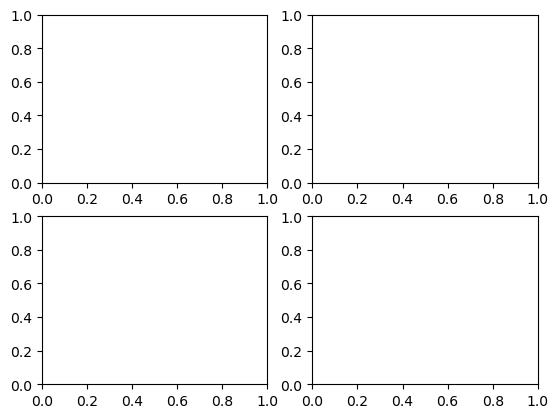

In [ ]:

n_rows = 2
n_cols = 2
fig, axs = plt.subplots(n_rows, n_cols)

def plot_channel_row(axs, ts, ys, channel_info, which_row, pick_successful_yn):

    axs.plot(ts, ys[0], label='Channel x')
    axs.axhline(channel_info['min_0'], color='r', linestyle='--', label='Min x')
    axs.axhline(channel_info['max_0'], color='g', linestyle='--', label='Max x')
    axs.set_xlabel('Time')
    axs.set_ylabel(f'Channel x Value')
    axs.legend()
    
    title = f"Row {which_row} {'(Successful)' if pick_successful_yn else '(Failed)'}"
    axs.set_title(title)

    plt.show()

# Extract data and call plot_channel_row

<!-- END QUESTION -->

## Week, 2: Problem 1b: Plot Wrist force/torque for min/max wrist torque z

Find the row that has the maximum (minimum) wrist torque z value. Plot the minimum one in the top row, the maximum
one in the bottom row

Your actual plotting code (the function) shouldn't have to change, btw. Just what data you send it.

Starting point: the function you wrote in the first week, get_row_with_max_peak

In [ ]:
...

Ellipsis

## Week 2: Problem 2: (optional) use reshape to make slicing not needed

np.reshape is the method you want; rearrange the data into rows, data channels, time series in each data channel (a 3 dimensional array)

In [ ]:

n_rows = 2
n_cols = 2
fig, axs = plt.subplots(n_rows, n_cols)

# Re-organize the data into an n_picks * n_channel_dims * n_time_steps (3 dimensional) array
pick_data_reorg = ...   # Use reshape, with the correct "order" option
# ... and another array that stores just the success/fail data
pick_data_success_fail = ...

# Then this plot call should plot the wrist force data for row zero
row = 0
plot_channel_row(axs[0, 0], ts, pick_data_reorg[row, 0:3, :], data_channels[0], which_row=row, pick_data_success_fail[row] == 1)

# ... and for wrist torque data
plot_channel_row(axs[0, 1], ts, pick_data_reorg[row, 3:6, :], data_channels[1], which_row=row, pick_data_success_fail[row] == 1)



SyntaxError: positional argument follows keyword argument (3300965914.py, line 12)

## Hours and collaborators
Required for every assignment - fill out before you hand-in.

Listing names and websites helps you to document who you worked with and what internet help you received in the case of any plagiarism issues. You should list names of anyone (in class or not) who has substantially helped you with an assignment - or anyone you have *helped*. You do not need to list TAs.

Listing hours helps us track if the assignments are too long.

In [ ]:

# List of names (creates a set)
worked_with_names = {"not filled out"}
# List of URLS (creates a set)
websites = {"not filled out"}
# Approximate number of hours, including lab/in-class time
hours = -1.5

# for all row, column in all_indices_from_where
#.   if this is the column for wrist torque 
#.      print(f"Row: {r}, Time step: {c // n_time_steps} Successful y/n: {pick_data[r, -1] == 1}, value: {pick_data[r, c]}")

In [ ]:
grader.check("hours_collaborators")

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Submit just the .ipynb file to Gradescope, HWK1 Arrays and Plotting. You do not need to put in the data files. Don't change the provided variable names or autograding will fail.

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)